In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [2]:
df1 = pd.read_csv(r"D:\PROJECT_6\store.csv")

print(df1.head())

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,

In [3]:
print(df1.shape)
df1.info()


(1115, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [4]:
df1_before = df1.copy()

In [5]:
num_cols_train = df1.select_dtypes(include=np.number).columns
cat_cols_train = df1.select_dtypes(exclude=np.number).columns

df1[num_cols_train] = df1[num_cols_train].fillna(
    df1[num_cols_train].median()
)
df1[cat_cols_train] = df1[cat_cols_train].fillna('Unknown')

# Compare missing values

print("Before cleaning:")
print(df1_before.isna().sum())

print("\nAfter cleaning:")
print(df1.isna().sum())

Before cleaning:
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

After cleaning:
Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


In [6]:
# Date conversion
if 'Date' in df1.columns:
    df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

# Identify categorical columns
cat_cols = df1.select_dtypes(exclude=np.number).columns

# Convert to category
df1[cat_cols] = df1[cat_cols].astype('category')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Store                      1115 non-null   int64   
 1   StoreType                  1115 non-null   category
 2   Assortment                 1115 non-null   category
 3   CompetitionDistance        1115 non-null   float64 
 4   CompetitionOpenSinceMonth  1115 non-null   float64 
 5   CompetitionOpenSinceYear   1115 non-null   float64 
 6   Promo2                     1115 non-null   int64   
 7   Promo2SinceWeek            1115 non-null   float64 
 8   Promo2SinceYear            1115 non-null   float64 
 9   PromoInterval              1115 non-null   category
dtypes: category(3), float64(5), int64(2)
memory usage: 64.9 KB


In [7]:
# Remove negative values
if 'Sales' in df1.columns:
    df1 = df1[df1['Sales'] >= 0]

# Remove extra spaces in text columns
for col in cat_cols:
    df1[col] = df1[col].astype(str).str.strip()

df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,Unknown
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,22.0,2012.0,Unknown
4,5,a,a,29910.0,4.0,2015.0,0,22.0,2012.0,Unknown


In [8]:
df1.to_csv("cleaned_store_data", index=False)
print("Cleaned Store data saved successfully")

Cleaned Store data saved successfully


In [9]:
df2 = pd.read_csv(r"D:\PROJECT_6\train.csv", low_memory=False)

print(df2.head())

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


In [10]:
print(df2.shape)
df2.info()

(1017209, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [11]:
df2_before = df2.copy()

In [12]:
num_cols_train = df2.select_dtypes(include=np.number).columns
cat_cols_train = df2.select_dtypes(exclude=np.number).columns

df2[num_cols_train] = df2[num_cols_train].fillna(
    df2[num_cols_train].median()
)
df2[cat_cols_train] = df2[cat_cols_train].fillna('Unknown')

# Compare missing values

print("Before cleaning:")
print(df2_before.isna().sum())

print("\nAfter cleaning:")
print(df2.isna().sum())

Before cleaning:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

After cleaning:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [13]:
# Date conversion
if 'Date' in df2.columns:
    df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')

# Identify categorical columns
cat_cols = df2.select_dtypes(exclude=np.number).columns

# Convert to category
df2[cat_cols] = df2[cat_cols].astype('category')

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype   
---  ------         --------------    -----   
 0   Store          1017209 non-null  int64   
 1   DayOfWeek      1017209 non-null  int64   
 2   Date           1017209 non-null  category
 3   Sales          1017209 non-null  int64   
 4   Customers      1017209 non-null  int64   
 5   Open           1017209 non-null  int64   
 6   Promo          1017209 non-null  int64   
 7   StateHoliday   1017209 non-null  category
 8   SchoolHoliday  1017209 non-null  int64   
dtypes: category(2), int64(7)
memory usage: 57.3 MB


In [14]:
# Remove negative values
if 'Sales' in df2.columns:
    df2 = df2[df2['Sales'] >= 0]

# Remove extra spaces in text columns
for col in cat_cols:
    df2[col] = df2[col].astype(str).str.strip()

df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [15]:
df2.to_csv("cleaned_train_data.csv", index=False)
print("Cleaned train data saved successfully")

Cleaned train data saved successfully


In [16]:
df3 = pd.read_csv(r"D:\PROJECT_6\test.csv")

print(df3.head())

   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2015-09-17   1.0      1            0              0


In [17]:
print(df3.shape)
df3.info()

(41088, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [18]:
df3_before = df3.copy()

In [19]:
num_cols_train = df3.select_dtypes(include=np.number).columns
cat_cols_train = df3.select_dtypes(exclude=np.number).columns

df3[num_cols_train] = df3[num_cols_train].fillna(
    df3[num_cols_train].median()
)
df3[cat_cols_train] = df3[cat_cols_train].fillna('Unknown')

# Compare missing values

print("Before cleaning:")
print(df3_before.isna().sum())

print("\nAfter cleaning:")
print(df3.isna().sum())

Before cleaning:
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

After cleaning:
Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [20]:
# Date conversion
if 'Date' in df3.columns:
    df3['Date'] = pd.to_datetime(df3['Date'], errors='coerce')

# Identify categorical columns
cat_cols = df3.select_dtypes(exclude=np.number).columns

# Convert to category
df3[cat_cols] = df3[cat_cols].astype('category')

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             41088 non-null  int64   
 1   Store          41088 non-null  int64   
 2   DayOfWeek      41088 non-null  int64   
 3   Date           41088 non-null  category
 4   Open           41088 non-null  float64 
 5   Promo          41088 non-null  int64   
 6   StateHoliday   41088 non-null  category
 7   SchoolHoliday  41088 non-null  int64   
dtypes: category(2), float64(1), int64(5)
memory usage: 2.0 MB


In [21]:
# Remove negative values
if 'Sales' in df3.columns:
    df3 = df3[df3['Sales'] >= 0]

# Remove extra spaces in text columns
for col in cat_cols:
    df3[col] = df3[col].astype(str).str.strip()

df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41088 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [22]:
df3.to_csv("cleaned_test_data.csv", index=False)
print("Cleaned test data saved successfully")

Cleaned test data saved successfully


In [23]:
df = pd.merge(df1, df2, on='Store', how='left')
df.info

<bound method DataFrame.info of          Store StoreType Assortment  CompetitionDistance  \
0            1         c          a               1270.0   
1            1         c          a               1270.0   
2            1         c          a               1270.0   
3            1         c          a               1270.0   
4            1         c          a               1270.0   
...        ...       ...        ...                  ...   
1017204   1115         d          c               5350.0   
1017205   1115         d          c               5350.0   
1017206   1115         d          c               5350.0   
1017207   1115         d          c               5350.0   
1017208   1115         d          c               5350.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                              9.0                    2008.0       0   
1                              9.0                    2008.0       0   
2                              

In [24]:
df = df.drop_duplicates()


df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Ensure numeric columns
num_cols = ["Sales", "Customers", "CompetitionDistance"]
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

df.info

<bound method DataFrame.info of          Store StoreType Assortment  CompetitionDistance  \
0            1         c          a               1270.0   
1            1         c          a               1270.0   
2            1         c          a               1270.0   
3            1         c          a               1270.0   
4            1         c          a               1270.0   
...        ...       ...        ...                  ...   
1017204   1115         d          c               5350.0   
1017205   1115         d          c               5350.0   
1017206   1115         d          c               5350.0   
1017207   1115         d          c               5350.0   
1017208   1115         d          c               5350.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                              9.0                    2008.0       0   
1                              9.0                    2008.0       0   
2                              

In [25]:
# Numeric → median
for col in df.select_dtypes(include=["int64", "float64"]).columns:
    df[col] = df[col].fillna(df[col].median())

# Categorical → mode
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].fillna(df[col].mode()[0])

df.info

<bound method DataFrame.info of          Store StoreType Assortment  CompetitionDistance  \
0            1         c          a               1270.0   
1            1         c          a               1270.0   
2            1         c          a               1270.0   
3            1         c          a               1270.0   
4            1         c          a               1270.0   
...        ...       ...        ...                  ...   
1017204   1115         d          c               5350.0   
1017205   1115         d          c               5350.0   
1017206   1115         d          c               5350.0   
1017207   1115         d          c               5350.0   
1017208   1115         d          c               5350.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                              9.0                    2008.0       0   
1                              9.0                    2008.0       0   
2                              

In [26]:
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower, upper)

for col in ["Sales", "Customers"]:
    if col in df.columns:
        handle_outliers_iqr(df, col)

df.info

<bound method DataFrame.info of          Store StoreType Assortment  CompetitionDistance  \
0            1         c          a               1270.0   
1            1         c          a               1270.0   
2            1         c          a               1270.0   
3            1         c          a               1270.0   
4            1         c          a               1270.0   
...        ...       ...        ...                  ...   
1017204   1115         d          c               5350.0   
1017205   1115         d          c               5350.0   
1017206   1115         d          c               5350.0   
1017207   1115         d          c               5350.0   
1017208   1115         d          c               5350.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                              9.0                    2008.0       0   
1                              9.0                    2008.0       0   
2                              

In [27]:
df.select_dtypes(include="object").head()


,StoreType,Assortment,PromoInterval,StateHoliday
0,c,a,Unknown,0
1,c,a,Unknown,0
2,c,a,Unknown,0
3,c,a,Unknown,0
4,c,a,Unknown,0


In [28]:
df.replace("Unknown", np.nan, inplace=True)


In [29]:
for col in df.columns:
    if df[col].dtype == "object":
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass


In [30]:
for col in df.select_dtypes(include=["int64","float64"]).columns:
    df[col] = df[col].fillna(df[col].median())
    
df.info

<bound method DataFrame.info of          Store StoreType Assortment  CompetitionDistance  \
0            1         c          a               1270.0   
1            1         c          a               1270.0   
2            1         c          a               1270.0   
3            1         c          a               1270.0   
4            1         c          a               1270.0   
...        ...       ...        ...                  ...   
1017204   1115         d          c               5350.0   
1017205   1115         d          c               5350.0   
1017206   1115         d          c               5350.0   
1017207   1115         d          c               5350.0   
1017208   1115         d          c               5350.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                              9.0                    2008.0       0   
1                              9.0                    2008.0       0   
2                              

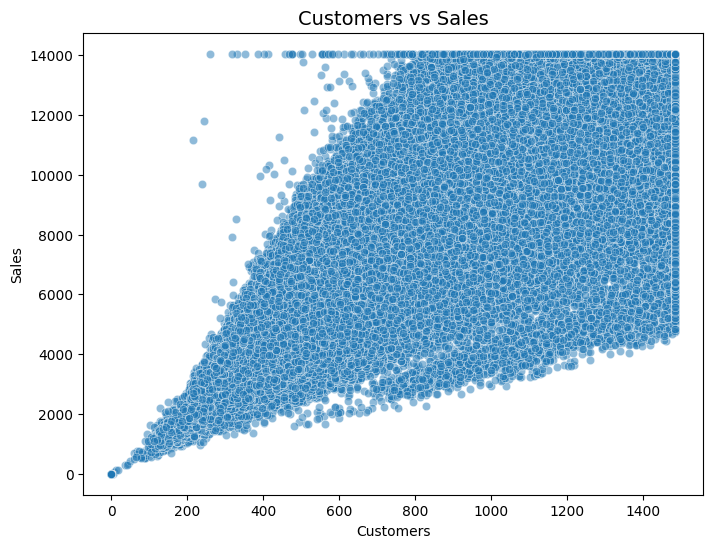

In [31]:
# Plot Sales vs. Customers
plt.figure(figsize=(8,6))

sns.scatterplot(
    x='Customers',
    y='Sales',
    data=df,     
    alpha=0.5
)

plt.title("Customers vs Sales", fontsize=14)
plt.xlabel("Customers")
plt.ylabel("Sales")
plt.show()


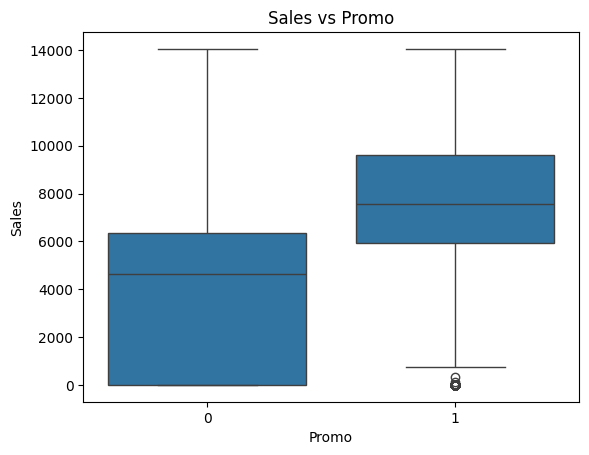

In [32]:
sns.boxplot(x="Promo", y="Sales", data=df)
plt.title("Sales vs Promo")
plt.show()


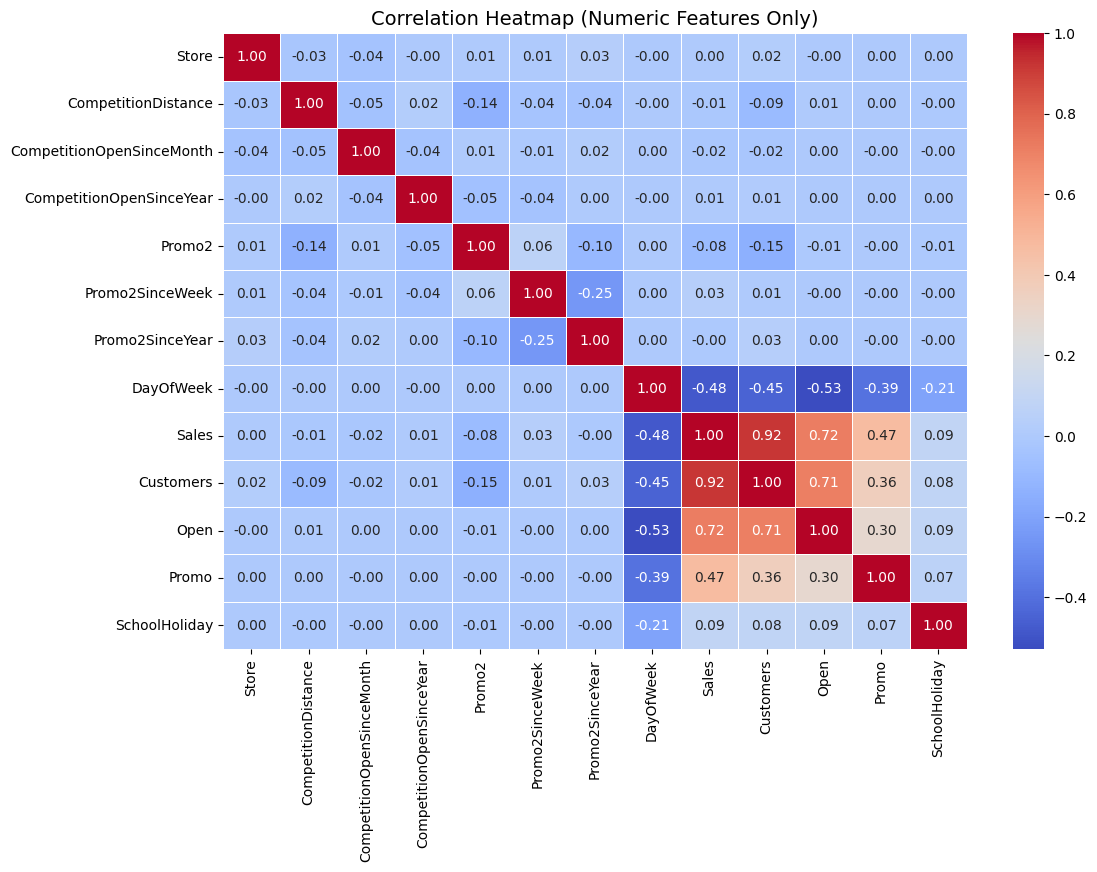

In [33]:
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), 
            cmap="coolwarm",
            annot=True,
            fmt=".2f",
            linewidths=0.5)

plt.title("Correlation Heatmap (Numeric Features Only)", fontsize=14)
plt.show()


In [34]:
df.to_csv("final_store_train_data.csv", index=False)
print("File saved successfully!")


File saved successfully!


In [35]:
df0 = pd.merge(df1, df3, on="Store", how="left")
print(df0.shape)


(41347, 17)


In [36]:
# =========================================
# 4. BASIC DATA CLEANING
# =========================================

# Strip column names
df0.columns = df0.columns.str.strip()

# Remove duplicates
df0.drop_duplicates(inplace=True)

# Check missing values
df0.isnull().sum()


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
Id                           259
DayOfWeek                    259
Date                         259
Open                         259
Promo                        259
StateHoliday                 259
SchoolHoliday                259
dtype: int64

In [37]:
# =========================================
# 5. DATA TYPE FIXING
# =========================================

# Convert Date column if exists
if 'Date' in df0.columns:
    df0['Date'] = pd.to_datetime(df0['Date'], errors='coerce')

# Separate column types
num_cols = df0.select_dtypes(include=['int64','float64']).columns
cat_cols = df0.select_dtypes(include='object').columns

# Convert categorical columns
df0[cat_cols] = df0[cat_cols].astype('category')
df0.info

<bound method DataFrame.info of        Store StoreType Assortment  CompetitionDistance  \
0          1         c          a               1270.0   
1          1         c          a               1270.0   
2          1         c          a               1270.0   
3          1         c          a               1270.0   
4          1         c          a               1270.0   
...      ...       ...        ...                  ...   
41342   1115         d          c               5350.0   
41343   1115         d          c               5350.0   
41344   1115         d          c               5350.0   
41345   1115         d          c               5350.0   
41346   1115         d          c               5350.0   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                            9.0                    2008.0       0   
1                            9.0                    2008.0       0   
2                            9.0                    2008.0   

In [38]:
# =========================================
# 6. HANDLE MISSING VALUES
# =========================================

# Numerical → median
df0[num_cols] = df0[num_cols].fillna(df0[num_cols].median())

# Categorical → mode
for col in cat_cols:
    df0[col] = df0[col].fillna(df0[col].mode()[0])
df0.info

<bound method DataFrame.info of        Store StoreType Assortment  CompetitionDistance  \
0          1         c          a               1270.0   
1          1         c          a               1270.0   
2          1         c          a               1270.0   
3          1         c          a               1270.0   
4          1         c          a               1270.0   
...      ...       ...        ...                  ...   
41342   1115         d          c               5350.0   
41343   1115         d          c               5350.0   
41344   1115         d          c               5350.0   
41345   1115         d          c               5350.0   
41346   1115         d          c               5350.0   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                            9.0                    2008.0       0   
1                            9.0                    2008.0       0   
2                            9.0                    2008.0   

In [39]:
# =========================================
# 7. OUTLIER HANDLING (IQR METHOD)
# =========================================

for col in num_cols:
    Q1 = df0[col].quantile(0.25)
    Q3 = df0[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df0[col] = np.clip(df0[col], lower, upper)
df0.info

<bound method DataFrame.info of        Store StoreType Assortment  CompetitionDistance  \
0          1         c          a               1270.0   
1          1         c          a               1270.0   
2          1         c          a               1270.0   
3          1         c          a               1270.0   
4          1         c          a               1270.0   
...      ...       ...        ...                  ...   
41342   1115         d          c               5350.0   
41343   1115         d          c               5350.0   
41344   1115         d          c               5350.0   
41345   1115         d          c               5350.0   
41346   1115         d          c               5350.0   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                            9.0                    2008.0       0   
1                            9.0                    2008.0       0   
2                            9.0                    2008.0   

In [40]:
# Ensure Date is datetime (invalid values become NaT)
df0['Date'] = pd.to_datetime(df0['Date'], errors='coerce')

# Feature engineering from Date
df0['Year']  = df0['Date'].dt.year
df0['Month'] = df0['Date'].dt.month
df0['Day']   = df0['Date'].dt.day

# Use nullable integer for Week (handles missing dates safely)
df0['Week']  = df0['Date'].dt.isocalendar().week.astype('Int64')

# Verify data types
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41347 entries, 0 to 41346
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      41347 non-null  int64         
 1   StoreType                  41347 non-null  category      
 2   Assortment                 41347 non-null  category      
 3   CompetitionDistance        41347 non-null  float64       
 4   CompetitionOpenSinceMonth  41347 non-null  float64       
 5   CompetitionOpenSinceYear   41347 non-null  float64       
 6   Promo2                     41347 non-null  int64         
 7   Promo2SinceWeek            41347 non-null  float64       
 8   Promo2SinceYear            41347 non-null  float64       
 9   PromoInterval              41347 non-null  category      
 10  Id                         41347 non-null  float64       
 11  DayOfWeek                  41347 non-null  float64       
 12  Date

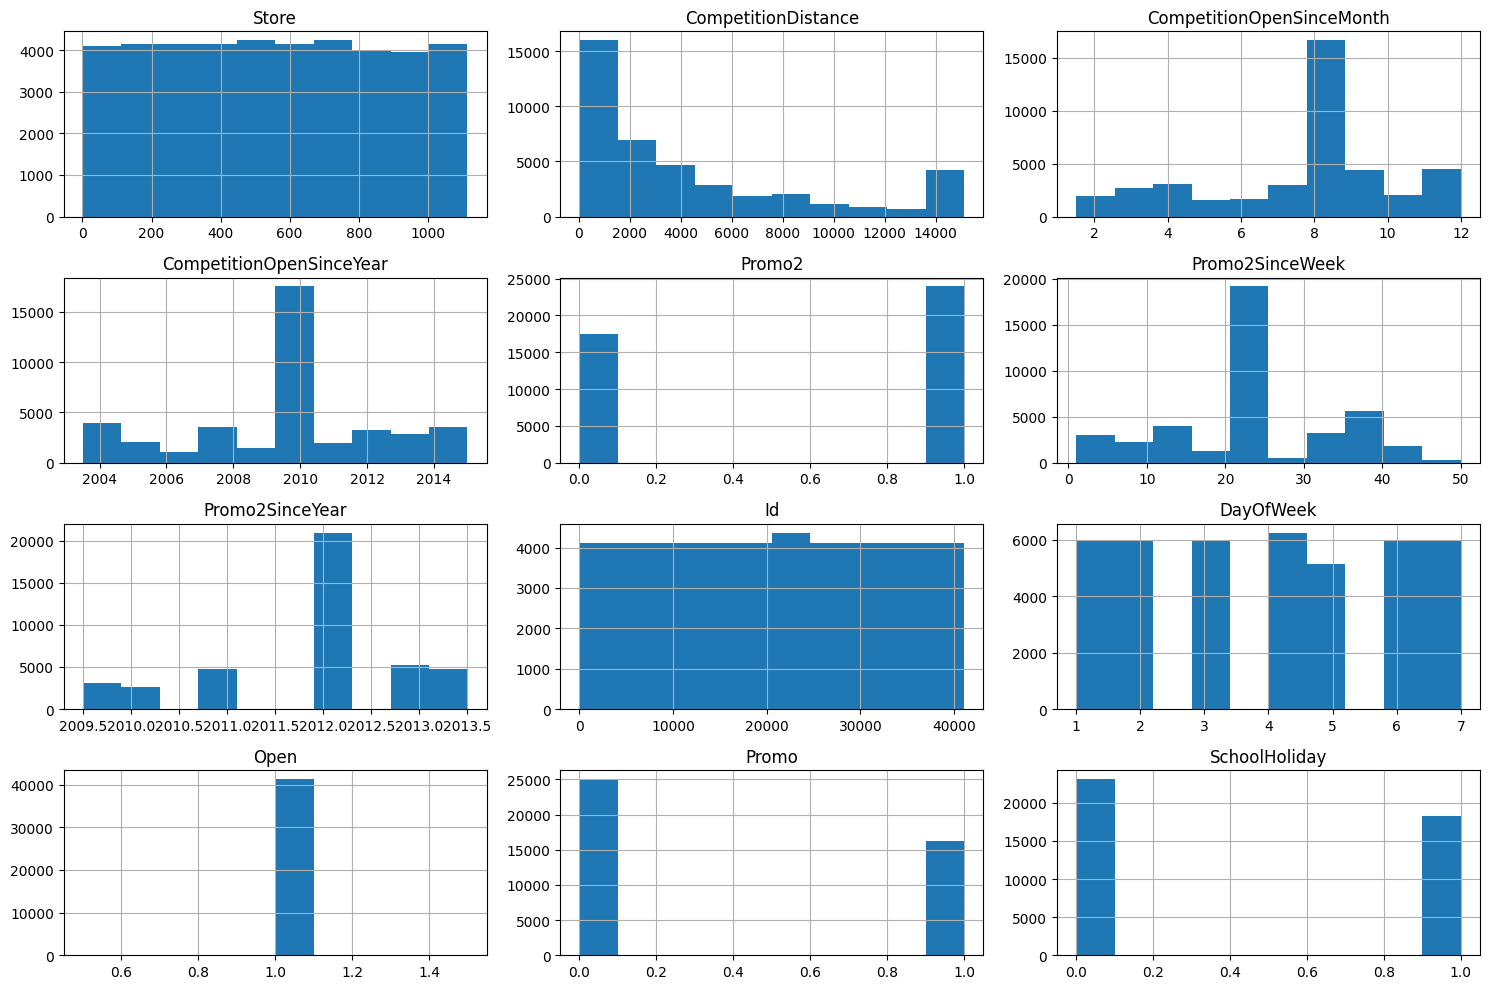

In [41]:
# =========================================
# 9. UNIVARIATE ANALYSIS
# =========================================
df0[num_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()


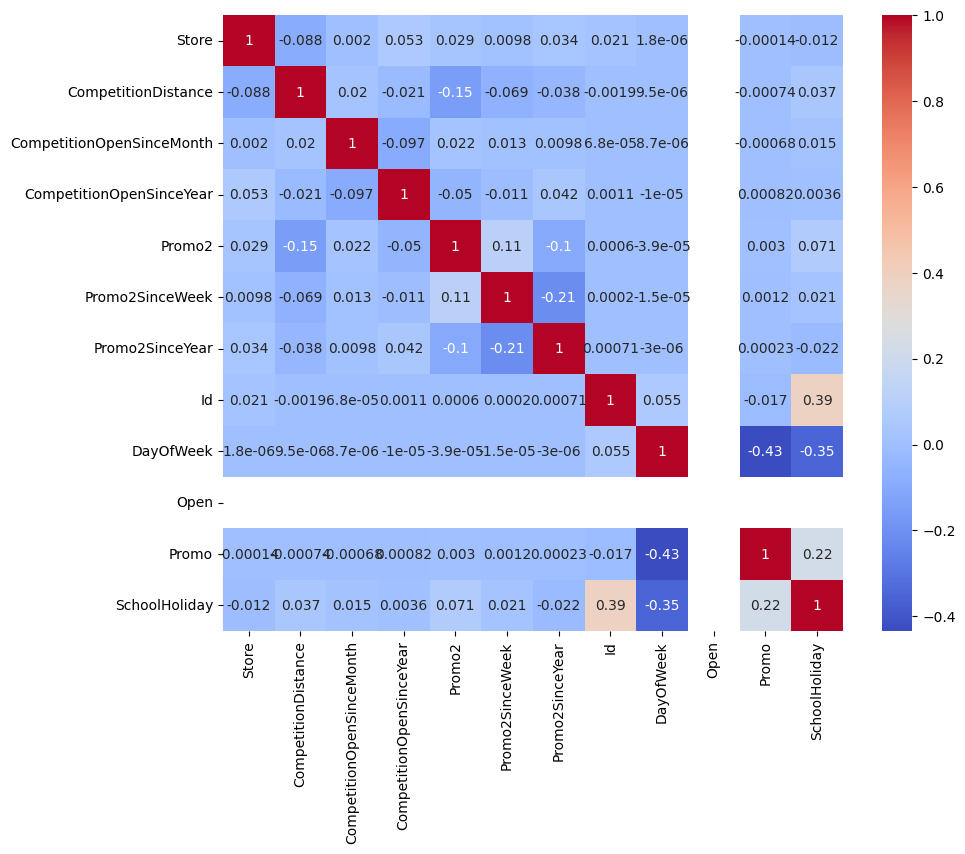

In [42]:
# =========================================
# 10. BIVARIATE ANALYSIS
# =========================================
plt.figure(figsize=(10,8))
sns.heatmap(df0[num_cols].corr(), annot=True, cmap="coolwarm")
plt.show()


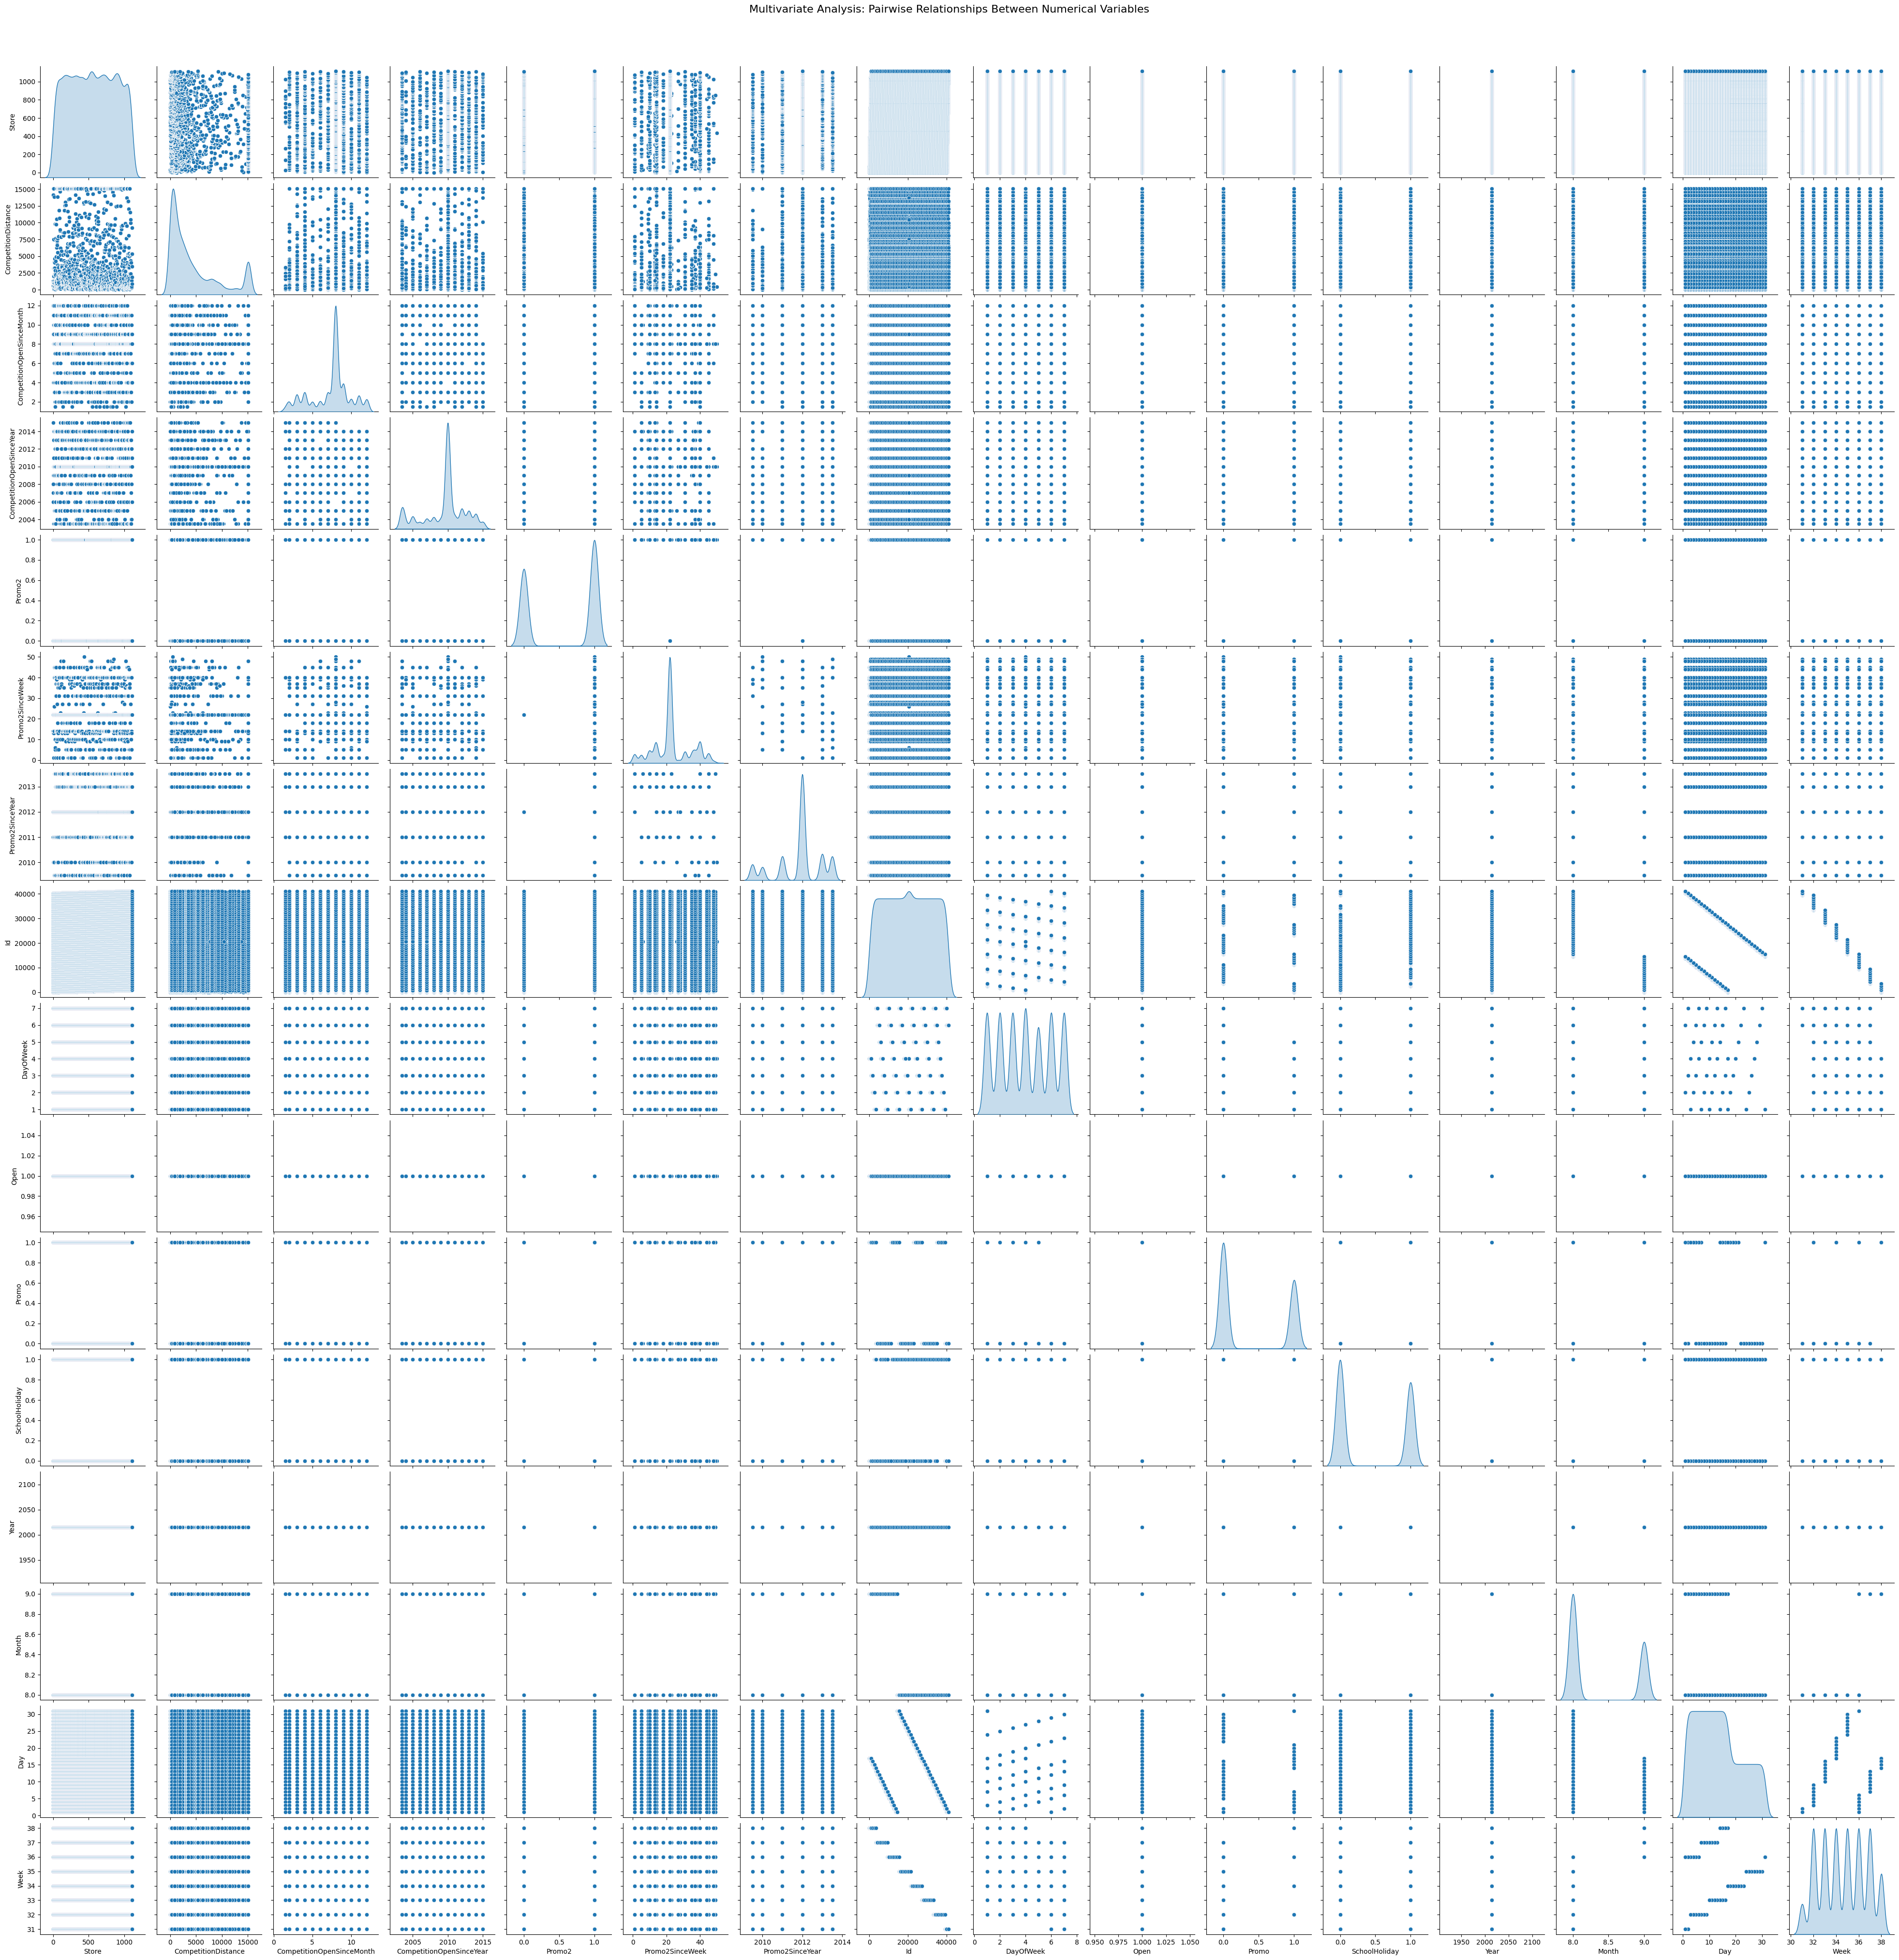

In [43]:
sns.pairplot(df0.select_dtypes(include='number'),diag_kind='kde')

plt.suptitle("Multivariate Analysis: Pairwise Relationships Between Numerical Variables", y=1.02,fontsize=16)
plt.show()


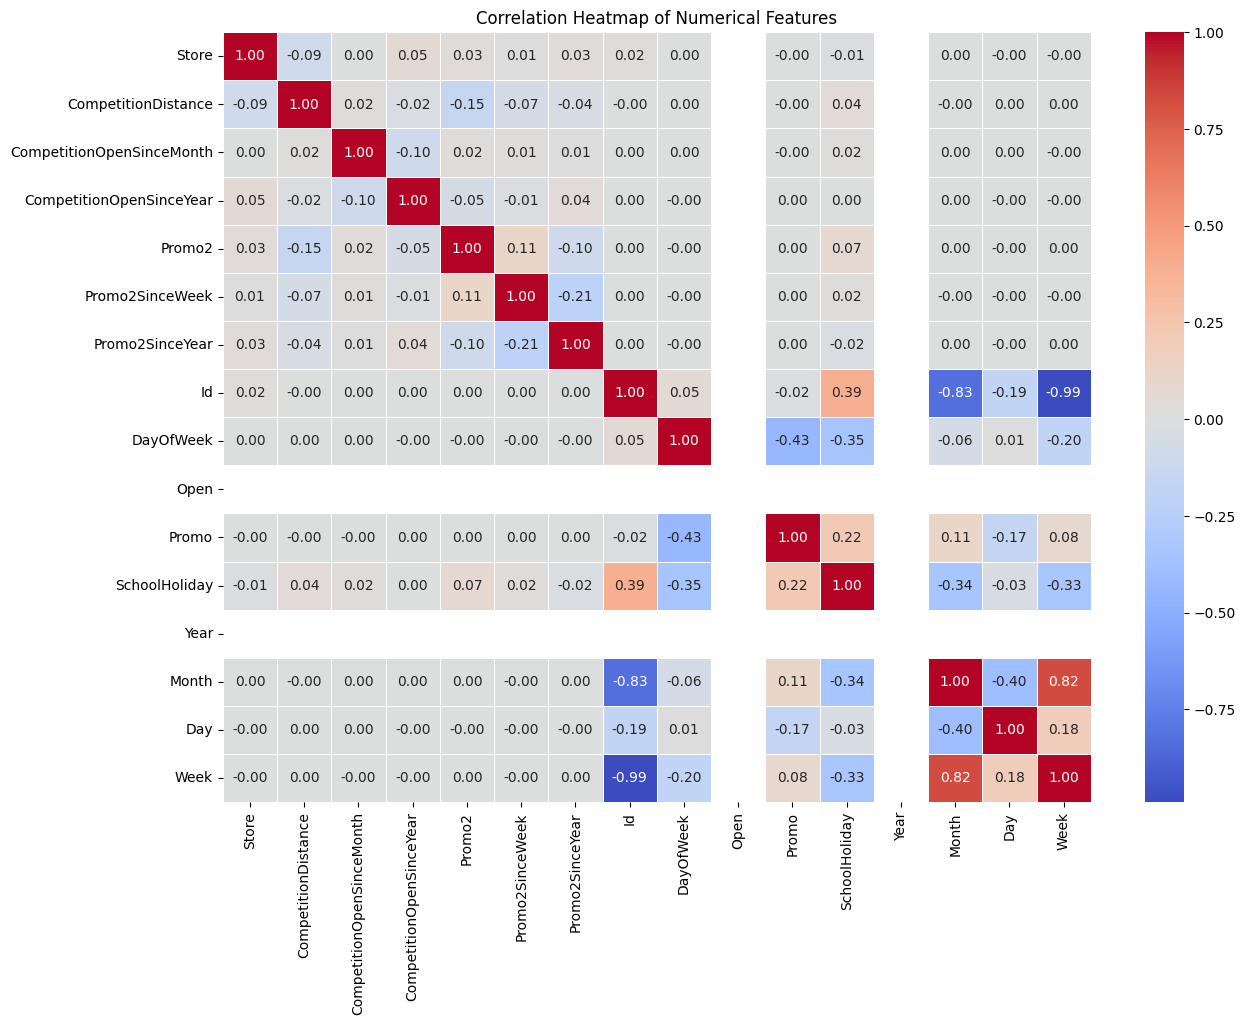

In [44]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    df0.select_dtypes(include='number').corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=12)
plt.show()

In [45]:
df0.to_csv("final_store_test_data.csv", index=False)
print("File saved successfully!")

File saved successfully!
